In [1]:
import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./weight-height.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [7]:
X = df.Height.values

In [8]:
X

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [9]:
X = df[["Height"]].values
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [10]:
y_true = df[["Weight"]].values
y_true


array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

In [11]:
print(X.shape)
print(y_true.shape)

(10000, 1)
(10000, 1)


In [12]:
np.array([73.84701702]).shape

(1,)

In [13]:
model = Sequential()

model.add(Dense(1, input_shape=(1,)))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(Adam(lr=0.8), "mean_squared_error")

In [16]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 2ms/step - loss: 35281.3594
Epoch 2/40
313/313 [==============================] - 1s 2ms/step - loss: 28204.8066
Epoch 3/40
313/313 [==============================] - 0s 2ms/step - loss: 22251.7305
Epoch 4/40
313/313 [==============================] - 1s 2ms/step - loss: 17287.5078
Epoch 5/40
313/313 [==============================] - 1s 2ms/step - loss: 13196.7373
Epoch 6/40
313/313 [==============================] - 0s 1ms/step - loss: 9878.6221
Epoch 7/40
313/313 [==============================] - 0s 1ms/step - loss: 7236.8838
Epoch 8/40
313/313 [==============================] - 1s 2ms/step - loss: 5183.7598
Epoch 9/40
313/313 [==============================] - 1s 2ms/step - loss: 3632.9336
Epoch 10/40
313/313 [==============================] - 0s 1ms/step - loss: 2504.0957
Epoch 11/40
313/313 [==============================] - 0s 1ms/step - loss: 1720.1642
Epoch 12/40
313/313 [==============================] - 0s 1ms/step - 

In [17]:
y_pred = model.predict(X)
y_pred

313/313 [==============================] - 1s 1ms/step


array([[180.34871],
       [168.09143],
       [180.98538],
       ...,
       [156.20003],
       [168.70206],
       [151.54468]], dtype=float32)

In [18]:
y_true

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

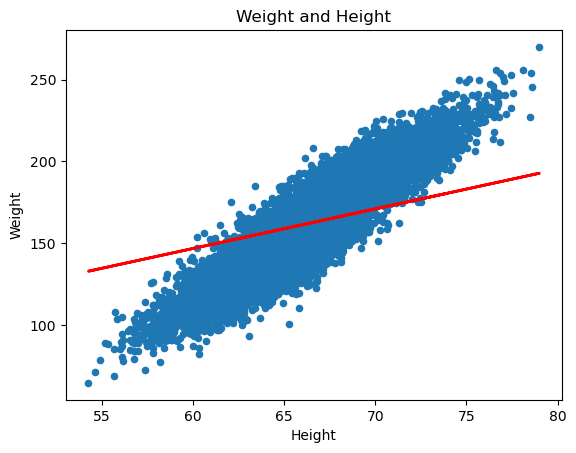

In [19]:
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Weight and Height")

plt.plot(X,y_pred, color='red', linewidth=2)

In [21]:
w, b = model.get_weights()

In [22]:
w

array([[2.4199436]], dtype=float32)

In [23]:
b

array([1.6430898], dtype=float32)

In [24]:
model.predict([[120]])

1/1 [==============================] - 0s 267ms/step


array([[292.03632]], dtype=float32)